## **TUGAS MACHINE LEARNING**
# **Klasifikasi Digit Menggunakan Convolutional Neural Network**

Nama : Daniel Maubara<br>
NIM : 2206080070

# **Memuat Dataset MNIST**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], as_supervised=True, with_info=True)

# Fungsi normalisasi gambar
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Preprocessing dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


# **Membangun Model CNN**

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

# **Melatih Model**

In [3]:
history = model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
469/469 [==============================] - 58s 110ms/step - loss: 0.2419 - accuracy: 0.9287 - val_loss: 0.0767 - val_accuracy: 0.9759
Epoch 2/5
469/469 [==============================] - 47s 101ms/step - loss: 0.0580 - accuracy: 0.9824 - val_loss: 0.0413 - val_accuracy: 0.9868
Epoch 3/5
469/469 [==============================] - 50s 105ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0365 - val_accuracy: 0.9873
Epoch 4/5
469/469 [==============================] - 48s 102ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0492 - val_accuracy: 0.9839
Epoch 5/5
469/469 [==============================] - 48s 103ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0308 - val_accuracy: 0.9899


# **Evaluasi Model**

In [4]:
loss, accuracy = model.evaluate(ds_test)
print(f'Model Loss: {loss}')
print(f'Model Accuracy: {accuracy}')

79/79 [==============================] - 2s 25ms/step - loss: 0.0308 - accuracy: 0.9899
Model Loss: 0.030845364555716515
Model Accuracy: 0.9898999929428101


# **Confusion Matrix**

1/1 [==============================] - 0s 22ms/step


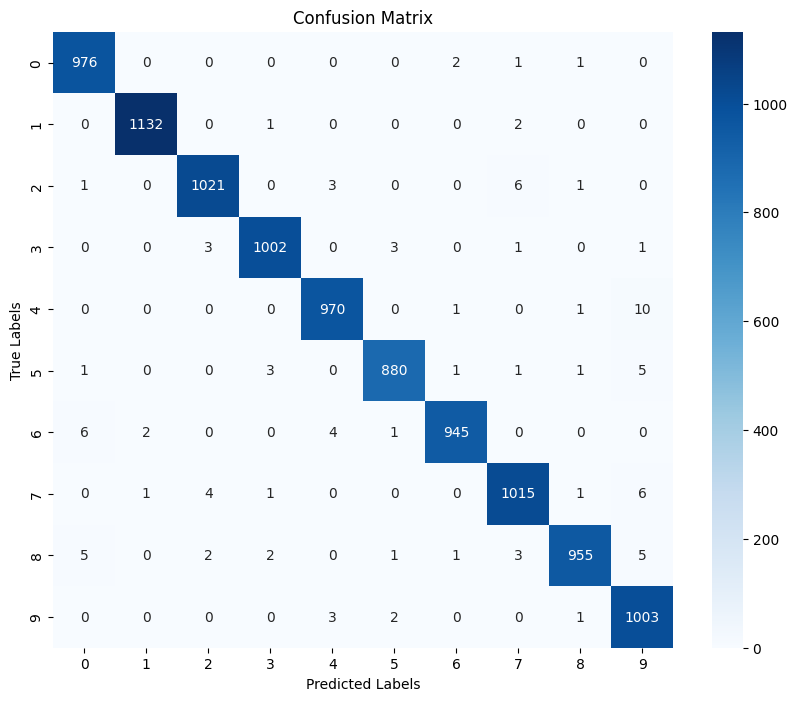

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Fungsi untuk membuat dan menampilkan confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    # Hitung confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot confusion matrix sebagai heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Ambil label aktual dan prediksi dari dataset test
true_labels, predicted_labels = get_labels_and_predictions(model, ds_test)

# Daftar nama kelas (0-9)
class_names = [str(i) for i in range(10)]

# Plot confusion matrix
plot_confusion_matrix(true_labels, predicted_labels, class_names)


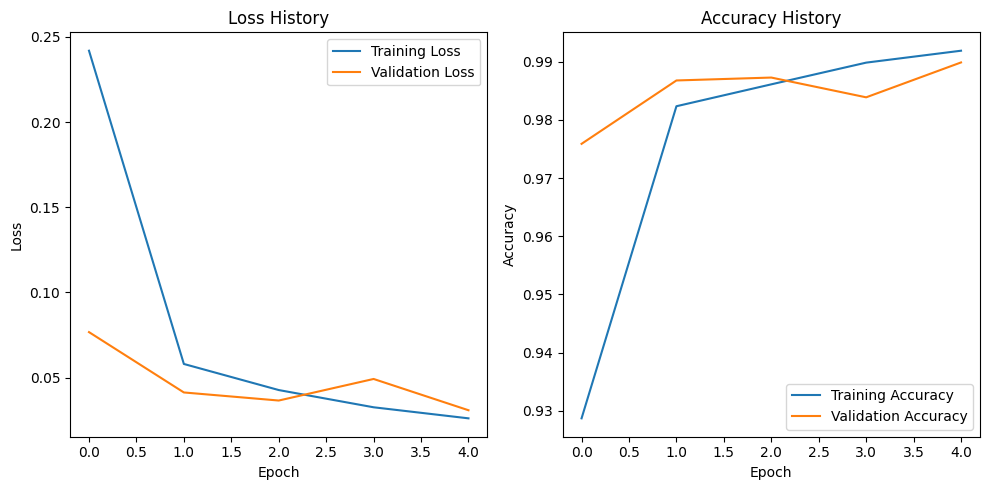

In [10]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot loss history
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy history
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualisasi loss dan akurasi
plot_training_history(history)

# **Prediksi**

4/4 [==============================] - 0s 9ms/step


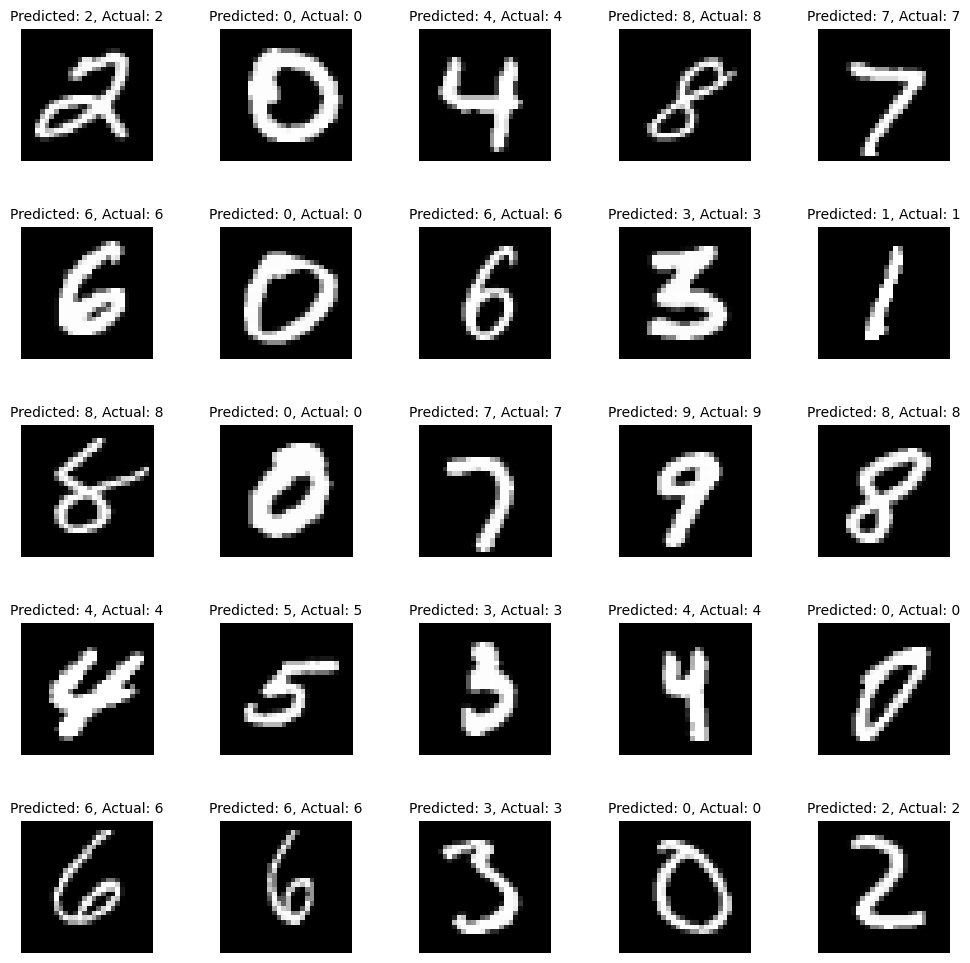

Accuracy: 1.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil satu batch dari dataset test
for images, labels in ds_test.take(1):
    images_batch = images.numpy()
    labels_batch = labels.numpy()

# Prediksi label menggunakan model
predictions = model.predict(images_batch)
predicted_labels = np.argmax(predictions, axis=1)

# Memperlihatkan beberapa gambar beserta prediksi dan label asli
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axes.flat):
    ax.imshow(images_batch[i].squeeze(), cmap='gray')
    ax.set_title(f'Predicted: {predicted_labels[i]}, Actual: {labels_batch[i]}', fontsize=10)
    ax.axis('off')
plt.show()

# Menghitung akurasi
accuracy = np.mean(predicted_labels == labels_batch)
print(f'Accuracy: {accuracy}')